In [1]:
!pip uninstall numpy
!rm -rf /usr/local/lib/python3.11/dist-packages/~umpy*

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4


In [2]:
!pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install pandas==2.2.2

In [4]:
!pip uninstall -y numpy pmdarima
!rm -rf /usr/local/lib/python3.11/dist-packages/~umpy*

!pip install numpy==1.26.4 pandas==2.2.2
!pip install pmdarima==2.0.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#AUTO ARIMA
from pmdarima import auto_arima
#ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError
#SARIMAX
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
#REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [6]:
#create dataframe by reading file
stock_market = pd.read_csv('data/synthetic_stock_data.csv')
stock_market.head()

,Date,Company,Sector,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,Dividend_Yield,Volatility,Sentiment_Score,Trend
0,2022-01-01,Uber,Technology,100.000000,101.036120,97.477809,100.000000,171958,5.156585e+11,24.253218,0.163090,0.047484,0.939232,Bearish
1,2022-01-02,Tesla,Automotive,100.071106,102.037960,97.152675,100.071106,196867,9.755658e+11,18.602848,0.288515,0.022472,0.469417,Bearish
2,2022-01-03,Panasonic,Finance,99.857828,101.517497,98.108097,99.857828,181932,4.595300e+11,10.728933,2.221827,0.019991,0.399193,Bullish
3,2022-01-04,Tencent,Automotive,98.851663,101.303783,96.998218,98.851663,153694,5.577481e+11,14.582696,1.377740,0.036166,0.705853,Stable
4,2022-01-05,Wells Fargo,Automotive,98.391118,99.990486,96.230707,98.391118,169879,8.607714e+11,37.491114,3.110198,0.034770,-0.768354,Stable


In [7]:
#Dataframe information
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1000 non-null   object 
 1   Company          1000 non-null   object 
 2   Sector           1000 non-null   object 
 3   Open             1000 non-null   float64
 4   High             1000 non-null   float64
 5   Low              1000 non-null   float64
 6   Close            1000 non-null   float64
 7   Volume           1000 non-null   int64  
 8   Market_Cap       1000 non-null   float64
 9   PE_Ratio         1000 non-null   float64
 10  Dividend_Yield   1000 non-null   float64
 11  Volatility       1000 non-null   float64
 12  Sentiment_Score  1000 non-null   float64
 13  Trend            1000 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 109.5+ KB


In [8]:
stock_market.columns

Index(['Date', 'Company', 'Sector', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market_Cap', 'PE_Ratio', 'Dividend_Yield', 'Volatility',
       'Sentiment_Score', 'Trend'],
      dtype='object')

In [9]:
stock_market['Company'].unique()

array(['Uber', 'Tesla', 'Panasonic', 'Tencent', 'Wells Fargo', 'Snapchat',
       'Adobe', 'Oracle', 'Novartis', 'Microsoft', 'Citigroup', 'HSBC',
       'Morgan Stanley', 'AstraZeneca', 'Moderna', 'Apple', 'Square',
       'Ferrari', 'PayPal', 'BP', 'Salesforce', 'Shell', 'Lamborghini',
       'Sony', 'Meta', 'Boeing', 'Lyft', 'IBM', 'Toyota', 'ExxonMobil',
       'Goldman Sachs', 'Intel', 'Chevron', 'Bank of America', 'LG',
       'AMD', 'Visa', 'Airbus', 'Mercedes-Benz', 'Nvidia', 'BMW',
       'SpaceX', 'Pfizer', 'Spotify', 'Netflix', 'TotalEnergies',
       'Samsung', 'Google', 'Roche', 'MasterCard', 'Ford',
       'Northrop Grumman', 'Amazon', 'General Motors', 'Alibaba',
       'Twitter', 'Lockheed Martin', 'Gilead Sciences', 'Porsche',
       'Johnson & Johnson', 'JPMorgan Chase', 'Raytheon', 'Honda'],
      dtype=object)

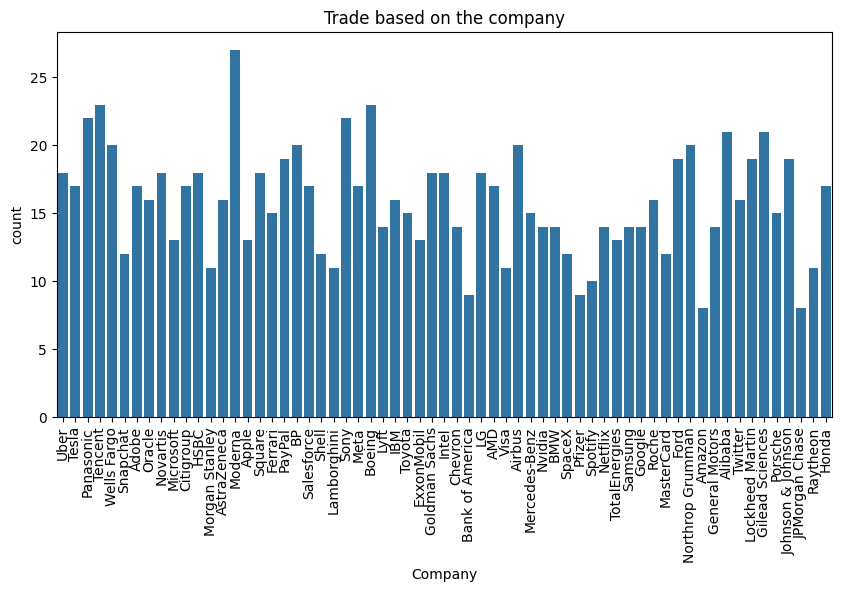

In [10]:
#plot trade based on the company
plt.figure(figsize=(10,5))
sns.countplot(x='Company',data=stock_market)
plt.title('Trade based on the company')
plt.xticks(rotation=90)
plt.show()

In [11]:
# 'Date' column is in datetime format
stock_market['Date'] = pd.to_datetime(stock_market['Date'])

In [12]:
# Now use .dt accessor
stock_market['dayofweek']=stock_market['Date'].dt.dayofweek
stock_market['day'] =stock_market['Date'].dt.day
stock_market['month']=stock_market['Date'].dt.month
stock_market['year']=stock_market['Date'].dt.year
stock_market['quarter']=stock_market['Date'].dt.quarter
stock_market['sin_day']=np.sin(stock_market['dayofweek'])
stock_market['cos_day']=np.cos(stock_market['dayofweek'])

stock_market.head(5)

,Date,Company,Sector,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,...,Volatility,Sentiment_Score,Trend,dayofweek,day,month,year,quarter,sin_day,cos_day
0,2022-01-01,Uber,Technology,100.000000,101.036120,97.477809,100.000000,171958,5.156585e+11,24.253218,...,0.047484,0.939232,Bearish,5,1,1,2022,1,-0.958924,0.283662
1,2022-01-02,Tesla,Automotive,100.071106,102.037960,97.152675,100.071106,196867,9.755658e+11,18.602848,...,0.022472,0.469417,Bearish,6,2,1,2022,1,-0.279415,0.960170
2,2022-01-03,Panasonic,Finance,99.857828,101.517497,98.108097,99.857828,181932,4.595300e+11,10.728933,...,0.019991,0.399193,Bullish,0,3,1,2022,1,0.000000,1.000000
3,2022-01-04,Tencent,Automotive,98.851663,101.303783,96.998218,98.851663,153694,5.577481e+11,14.582696,...,0.036166,0.705853,Stable,1,4,1,2022,1,0.841471,0.540302
4,2022-01-05,Wells Fargo,Automotive,98.391118,99.990486,96.230707,98.391118,169879,8.607714e+11,37.491114,...,0.034770,-0.768354,Stable,2,5,1,2022,1,0.909297,-0.416147


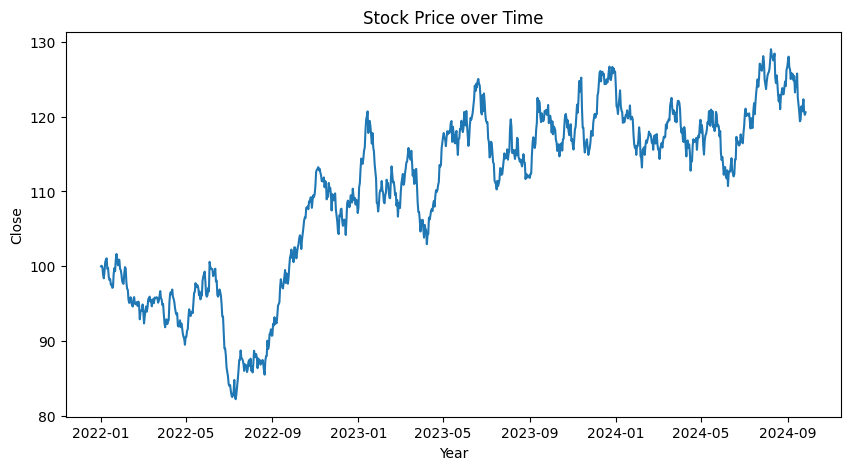

In [13]:
#plot graph on the closing
fig = plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Close')
plt.plot(stock_market['Date'], stock_market['Close'])
plt.title('Stock Price over Time')
plt.show()

In [14]:
#Drop Date column
stock_market = stock_market.drop(['Company','Sector'],axis=1)
stock_market.head()

,Date,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,Dividend_Yield,Volatility,Sentiment_Score,Trend,dayofweek,day,month,year,quarter,sin_day,cos_day
0,2022-01-01,100.000000,101.036120,97.477809,100.000000,171958,5.156585e+11,24.253218,0.163090,0.047484,0.939232,Bearish,5,1,1,2022,1,-0.958924,0.283662
1,2022-01-02,100.071106,102.037960,97.152675,100.071106,196867,9.755658e+11,18.602848,0.288515,0.022472,0.469417,Bearish,6,2,1,2022,1,-0.279415,0.960170
2,2022-01-03,99.857828,101.517497,98.108097,99.857828,181932,4.595300e+11,10.728933,2.221827,0.019991,0.399193,Bullish,0,3,1,2022,1,0.000000,1.000000
3,2022-01-04,98.851663,101.303783,96.998218,98.851663,153694,5.577481e+11,14.582696,1.377740,0.036166,0.705853,Stable,1,4,1,2022,1,0.841471,0.540302
4,2022-01-05,98.391118,99.990486,96.230707,98.391118,169879,8.607714e+11,37.491114,3.110198,0.034770,-0.768354,Stable,2,5,1,2022,1,0.909297,-0.416147


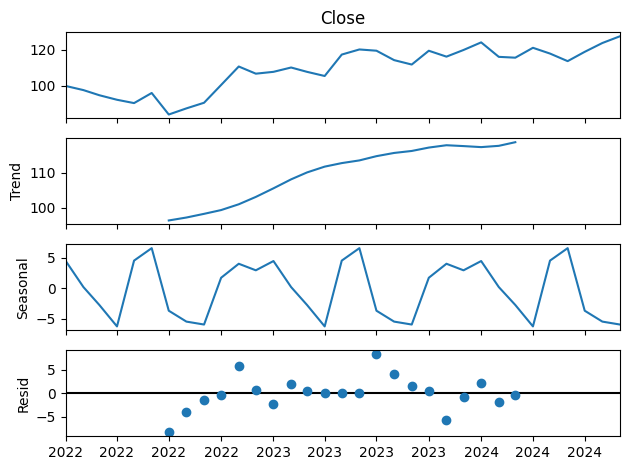

In [15]:
# Decompose the Close column

stock_market['Date'] = pd.to_datetime(stock_market['Date'])
df_stock_d = stock_market.set_index('Date').asfreq('MS')


# Seasonal decomposition on the Close column
decomposition = seasonal_decompose(df_stock_d['Close'] ,model='additive', period=12)
fig = decomposition.plot()

# Format x-axis to show years only
for ax in fig.axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Auto-format for better spacing
plt.tight_layout()
plt.show()

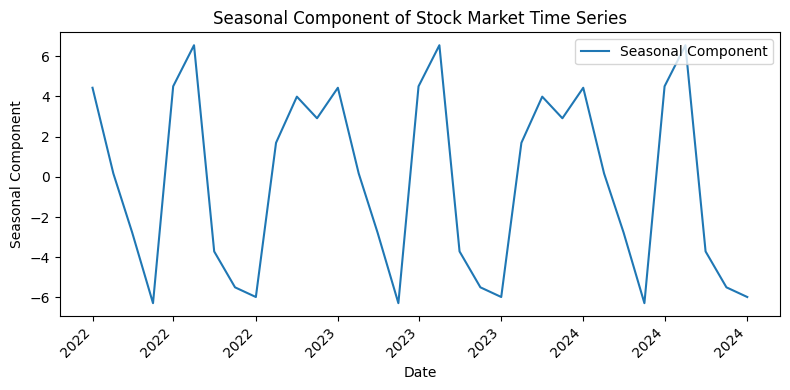

In [16]:
# Plot the seasonal component
plt.figure(figsize=(8, 4))
plt.plot(decomposition.seasonal.dropna(), label='Seasonal Component')

# Title and labels
plt.title('Seasonal Component of Stock Market Time Series')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')

# Format x-axis ticks to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-tick labels
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

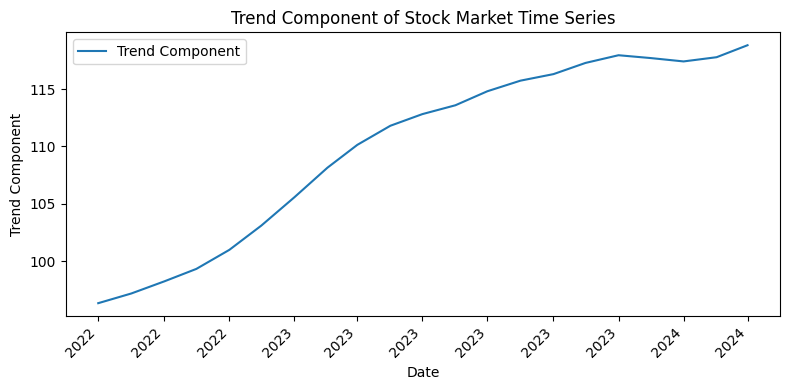

In [17]:
# Plot the Trend component
plt.figure(figsize=(8, 4))
plt.plot(decomposition.trend, label='Trend Component')
# Title and label
plt.title('Trend Component of Stock Market Time Series')
plt.xlabel('Date')
plt.ylabel('Trend Component')

#Formate x-axis to show only the years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#Rotate x-tick labels
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

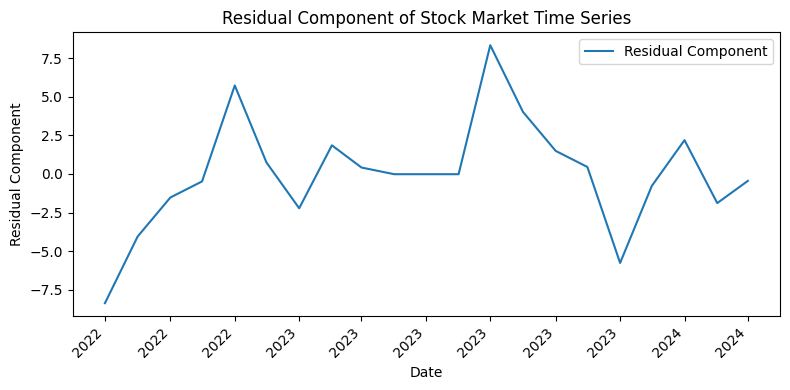

In [18]:
# Plot the Residual component
plt.figure(figsize=(8, 4))
plt.plot(decomposition.resid, label='Residual Component')

# Title and label
plt.title('Residual Component of Stock Market Time Series')
plt.xlabel('Date')
plt.ylabel('Residual Component')

#Formate x-axis to show only the years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#Rotate x-tick labels
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

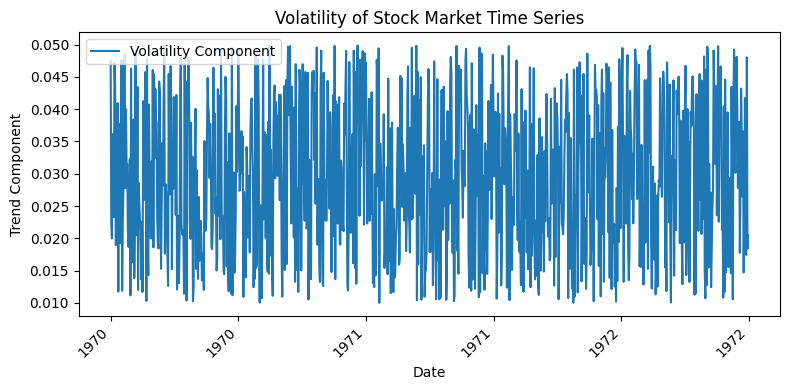

In [19]:
# Plot the Volatility component
plt.figure(figsize=(8, 4))
plt.plot(stock_market['Volatility'],label='Volatility Component')
#Title and label
plt.title('Volatility of Stock Market Time Series')
plt.ylabel('Trend Component')
plt.xlabel('Date')
#Fromate xaxis to show only year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#Rotate x-tick labels
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


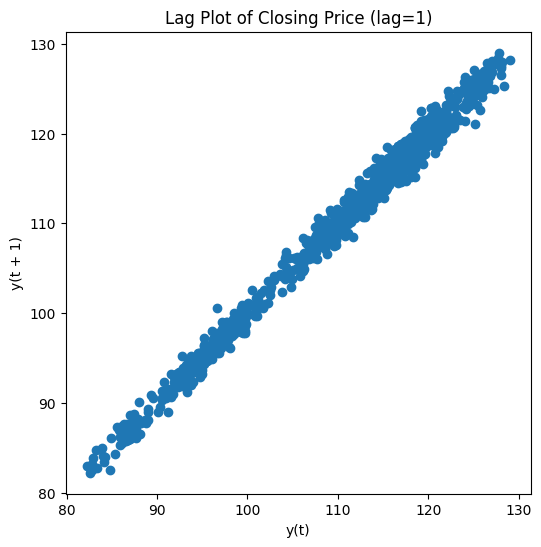

In [20]:
#Plot lag plot on the d'Close'
plt.figure(figsize=(6, 6))
lag_plot(stock_market['Close'], lag=1)
plt.title("Lag Plot of Closing Price (lag=1)")
plt.show()

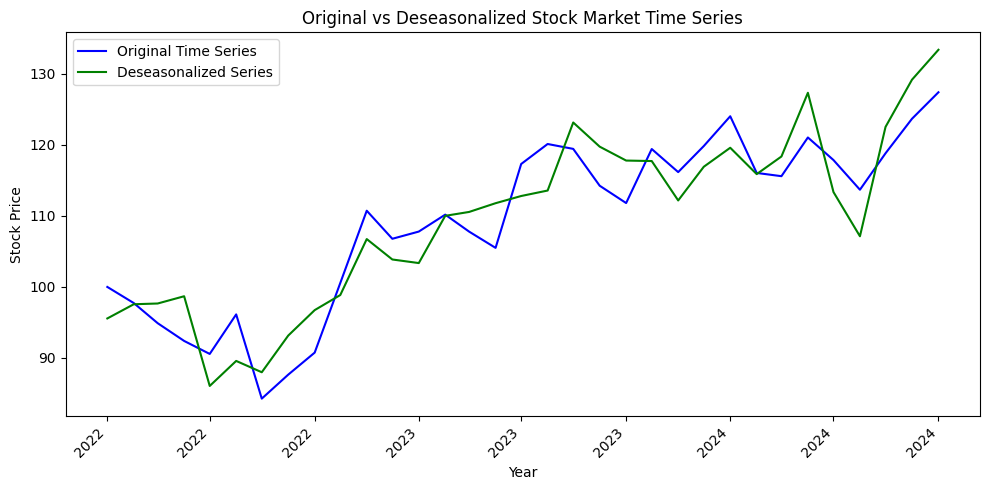

In [21]:
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(10, 5))
plt.plot(df_stock_d.index, df_stock_d['Close'], label='Original Time Series', color='blue')

# Remove the seasonal component for the additive model
data_without_seasonal_values = df_stock_d['Close'] - decomposition.seasonal
data_without_seasonal = pd.Series(data_without_seasonal_values, index=df_stock_d.index)


# Plot the deseasonalized data, explicitly using its index for the x-axis
plt.plot(data_without_seasonal.index, data_without_seasonal.values, label='Deseasonalized Series', color='green')

# Adding title and labels
plt.title('Original vs Deseasonalized Stock Market Time Series')
plt.xlabel('Year')
plt.ylabel('Stock Price')
# Rotate date labels for better readability
plt.xticks(rotation=45, ha='right')

# Format xaxis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adding the legend
plt.legend()

# Ensuring the layout looks good and tight
plt.tight_layout()
# Display the plot
plt.show()

In [22]:
#stationary check
#Ho: TS is non-Stationary
#H1: TS is stationary
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=9).mean()
    rolstd = timeseries.rolling(window=9).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

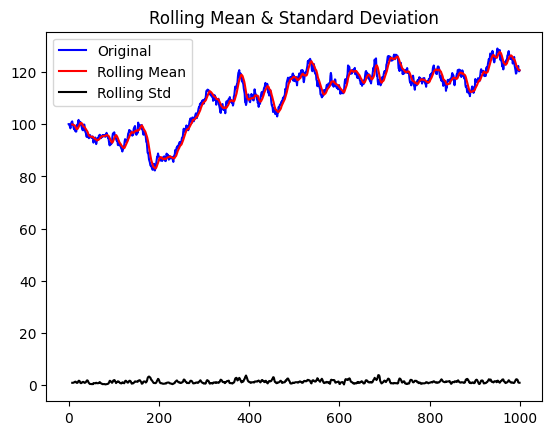

Results of Dickey-Fuller Test:
Test Statistic                  -1.503897
p-value                          0.531582
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [23]:
test_stationarity(stock_market['Close'])

p-value should be less than equal to 0.5 indicates time series is not stationary.

Test Statistic value should be always less than critical value indicates time series in not stationary

Need to go for tranformation.

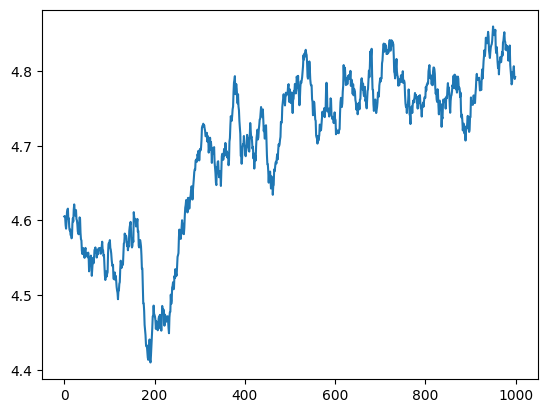

In [24]:
#Transformation
#Making TS Stationary
ts_log=np.log(stock_market['Close'])
ts_log.head()

stock_market['Close_log']=ts_log

plt.plot(ts_log)
plt.show()

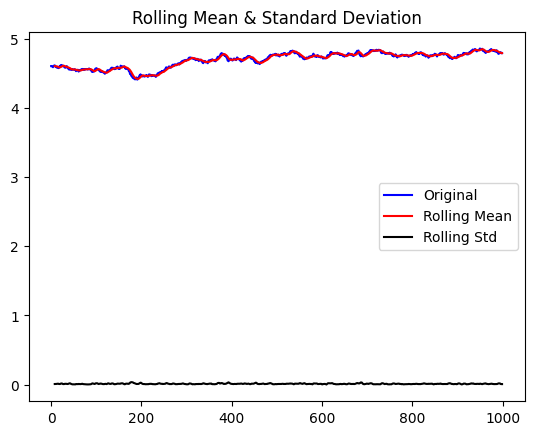

Results of Dickey-Fuller Test:
Test Statistic                  -1.425273
p-value                          0.570102
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [25]:
test_stationarity(ts_log)

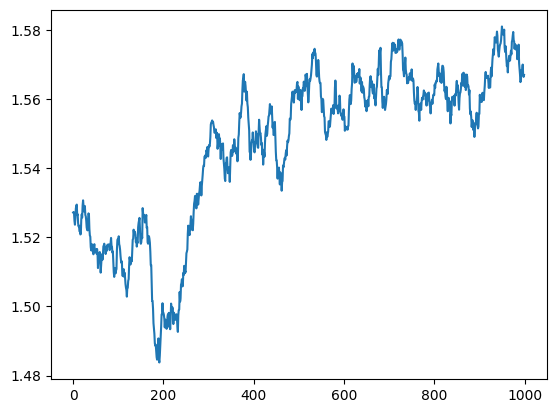

In [26]:
#check double log
ts_doublelog = np.log(ts_log)
ts_doublelog.head()

stock_market['Close_doublelog']=ts_doublelog

plt.plot(ts_doublelog)
plt.show()

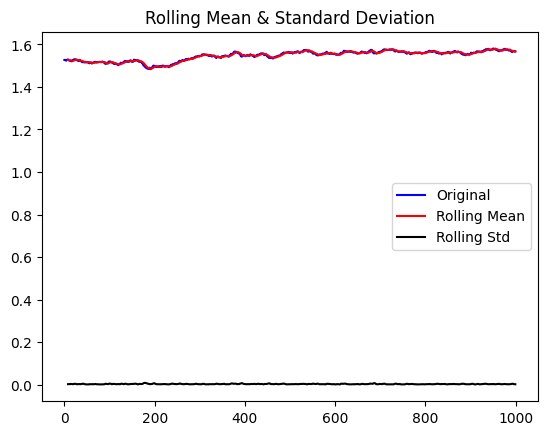

Results of Dickey-Fuller Test:
Test Statistic                  -1.411078
p-value                          0.576954
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [27]:
test_stationarity(ts_doublelog)

P-value is increasing and Test statistic is decreasing it indicates that the evidence against the null hypothesis is weakening

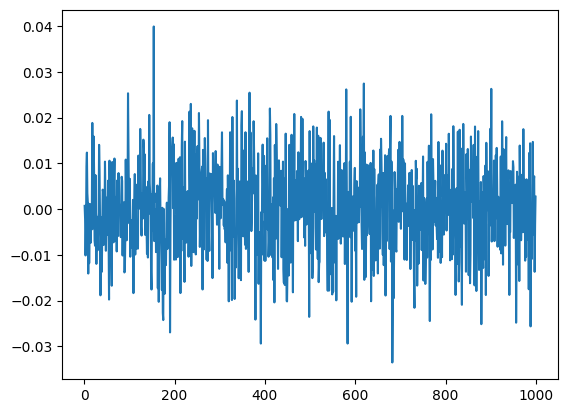

In [28]:
# First Difference
ts_log_diff = ts_log.diff()
stock_market['Close_diff']=ts_log_diff
plt.plot(ts_log_diff)
plt.show()

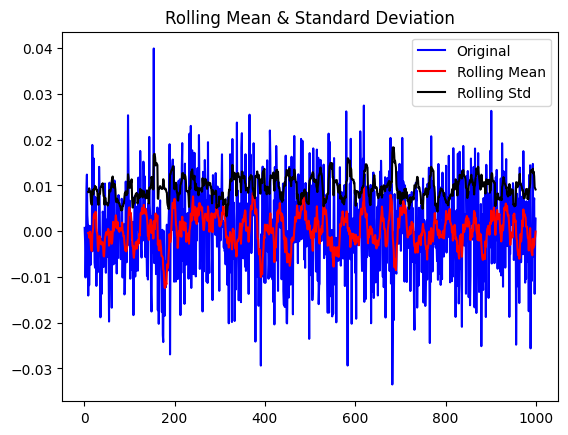

Results of Dickey-Fuller Test:
Test Statistic                 -31.875466
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    998.000000
Critical Value (1%)             -3.436919
Critical Value (5%)             -2.864440
Critical Value (10%)            -2.568314
dtype: float64


In [29]:
test_stationarity(ts_log_diff.dropna())

Test statistic is much lower than the critical value at the 5% level.

Test p-value is much smaller than 0.05.

The test result indicates reject the null hypothesis → the series is stationary

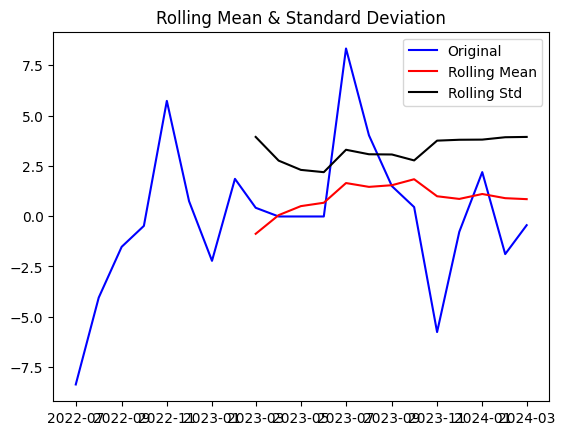

Results of Dickey-Fuller Test:
Test Statistic                 -3.798238
p-value                         0.002925
#Lags Used                      0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


In [30]:
test_stationarity(decomposition.resid.dropna())

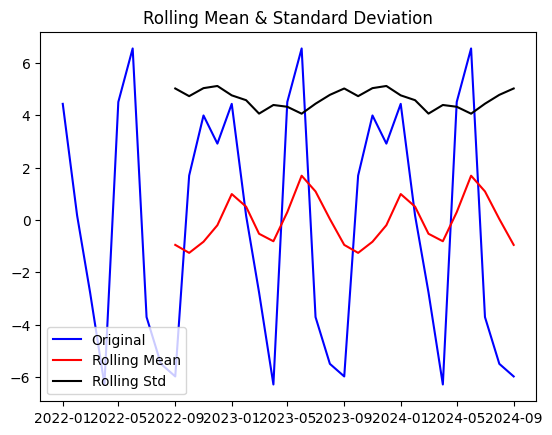

Results of Dickey-Fuller Test:
Test Statistic                -4.406129e+13
p-value                        0.000000e+00
#Lags Used                     1.000000e+01
Number of Observations Used    2.200000e+01
Critical Value (1%)           -3.769733e+00
Critical Value (5%)           -3.005426e+00
Critical Value (10%)          -2.642501e+00
dtype: float64


In [31]:
test_stationarity(decomposition.seasonal.dropna())

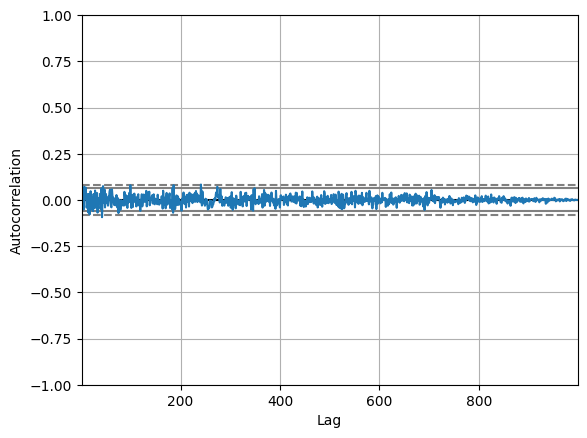

In [32]:
#Auto correlation of the stationary data
ts_stationary = ts_log_diff.dropna()
autocorrelation_plot(ts_stationary)
plt.show()

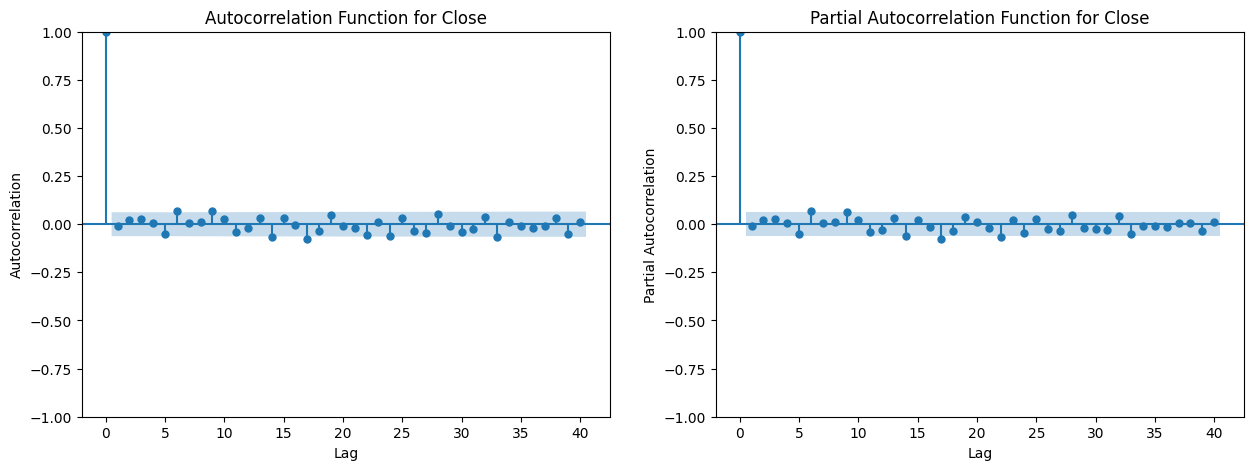

In [33]:
#Autocoreation and partial autocorrelation
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(ts_stationary, lags=40, ax=ax)
ax.set_title('Autocorrelation Function for Close')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plot_pacf(ts_stationary, lags=40, ax=ax1)
ax1.set_title('Partial Autocorrelation Function for Close')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Partial Autocorrelation')
plt.show()

Both ACF and PACF drop sharply after lag 1, this series is likely stationary

Component	              Observation	                      Suggestion
ACF	                    Drops after lag 1	                q = 1 (MA(1))
PACF	                  Drops after lag 1	                p = 1 (AR(1))

Suitable model is ARIMA(1,1,1),Where d = 1 because the data became stationary after differencing


In [34]:
#stock_market['year'].value_counts()

In [35]:
#prepare train data
stock_market.sort_values(by=['year'], inplace=True)
stock_market.head()

df_train =stock_market[stock_market['year']<2024]
X_train = df_train.drop(['Close_diff'],axis=1)
y_train = df_train['Close_diff']


In [36]:
#prepare test data
dt_test = stock_market[stock_market['year']>=2024]
X_test = dt_test.drop(['Close_diff'],axis=1)
y_test = dt_test['Close_diff']

In [37]:
print(f'Length of train data :{len(df_train)}' )
print(f'Length of test data :{len(dt_test)}' )

Length of train data :730
Length of test data :270


In [38]:
#AR Model
#training will be 73%, test will be 27% as per our model
import warnings
warnings.filterwarnings("ignore")

history = [x for x in y_train]
predictions = list()
y_test = y_test.reset_index(drop=True)
for t in range(len(y_test)):
    try:
        model = ARIMA(history, order=(2,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = y_test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)**0.5
print('Test MSE: %.3f' % rmse)

# Inverse transformation of predictions
# Get the last log(Close) from training set
start_index = len(y_train)
last_log_close = ts_log.iloc[start_index]

#Reconstruct log(Close) using cumulative sum of predictions
reconstructed_log_close = pd.Series(predictions).cumsum() + last_log_close
#Inverse log to get predicted Close prices
reconstructed_close = np.exp(reconstructed_log_close)

#Also invert y_test for comparison
actual_log_close = y_test.cumsum() + last_log_close
actual_close = np.exp(actual_log_close)

#Mean square error
from math import sqrt
rmse= sqrt(mean_squared_error(actual_close, reconstructed_close))
print('RMSE: %.6f' % rmse)

predicted=0.006372, expected=0.011760
predicted=0.004599, expected=-0.002103
predicted=0.003734, expected=0.026283
predicted=0.012253, expected=-0.001079
predicted=0.007952, expected=-0.006994
predicted=0.005188, expected=0.002104
predicted=-0.001941, expected=0.010612
predicted=0.002369, expected=-0.000682
predicted=0.003974, expected=-0.004251
predicted=0.001497, expected=0.008519
predicted=0.001407, expected=-0.007081
predicted=-0.000963, expected=0.002073
predicted=0.000968, expected=0.010261
predicted=0.002172, expected=0.013380
predicted=0.008867, expected=-0.008905
predicted=0.004475, expected=-0.008214
predicted=-0.001811, expected=0.002720
predicted=-0.004507, expected=-0.000702
predicted=-0.001875, expected=-0.001461
predicted=0.000079, expected=0.002480
predicted=0.000187, expected=-0.008060
predicted=-0.002513, expected=0.011496
predicted=0.002179, expected=-0.009679
predicted=-0.002065, expected=-0.001196
predicted=-0.000138, expected=0.019199
predicted=0.003414, expected=

In [39]:
#Hyperparameter tunning using auto arima
history = [x for x in y_train.dropna()]  # Training data
predictions = list()
y_test = y_test.reset_index(drop=True)  # Reset index of test data

for t in range(len(y_test)):
    try:
        # Fit auto_arima model on the historical data
        model = auto_arima(history,
                           seasonal=False,
                           stepwise=True,
                           suppress_warnings=True,
                           trace=True)

        # Forecast the next value
        forecast = model.predict(n_periods=1)
        yhat = forecast[0]
        predictions.append(yhat)

        # Actual observed value
        obs = y_test[t]

        # Add the observed value to the history for next iteration
        history.append(obs)

        # Optionally print the summary of the best model
        # model.summary()

        print(f'Predicted={yhat:.6f}, Expected={obs:.6f}')

    except (ValueError, LinAlgError) as e:
        print(f"Error in ARIMA model: {e}")
        continue
# Calculate Mean Squared Error (MSE) between predictions and actual values
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.6f}')

# Inverse transformation of predictions
# Get the last log(Close) from training set
start_index = len(y_train)
last_log_close = ts_log.iloc[start_index]

#Reconstruct log(Close) using cumulative sum of predictions
reconstructed_log_close = pd.Series(predictions).cumsum() + last_log_close
#Inverse log to get predicted Close prices
reconstructed_close = np.exp(reconstructed_log_close)

#Also invert y_test for comparison
actual_log_close = y_test.cumsum() + last_log_close
actual_close = np.exp(actual_log_close)

#Mean square error
auto_mse = mean_squared_error(actual_close, reconstructed_close)
auto_rmse= sqrt(mean_squared_error(actual_close, reconstructed_close))
print('MSE: %.6f' % auto_mse)
print('RMSE: %.6f' % auto_rmse)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-4643.574, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4649.351, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-4648.897, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-4648.808, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4647.059, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4648.089, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.361 seconds
Predicted=0.000000, Expected=0.011760
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-4649.564, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4655.337, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-4654.902, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-4654.813, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4653.028, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4654.151, Time=0.18

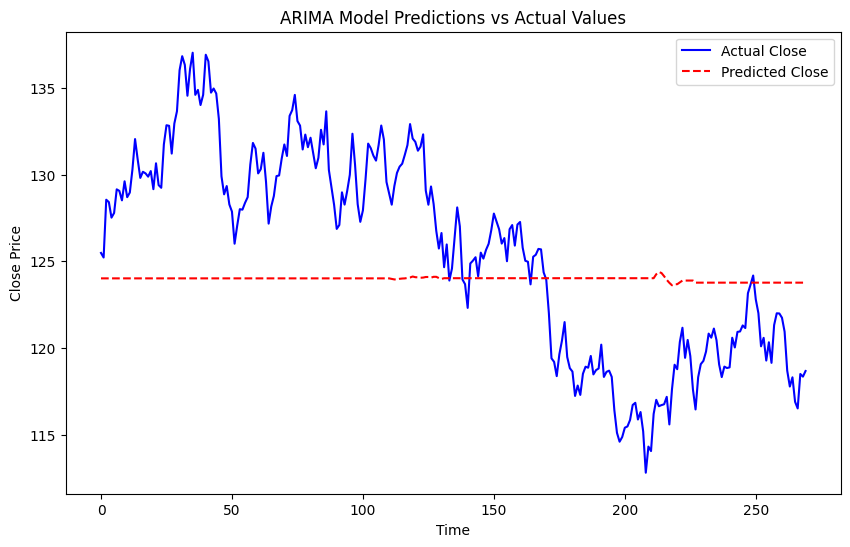

In [40]:
# plot ARIMA model.
plt.figure(figsize=(10, 6))
plt.plot(actual_close.values, label='Actual Close', color='blue')
plt.plot(reconstructed_close.values, label="Predicted Close",color='red', linestyle='--')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# SARIMAX

In [41]:
#SARIMAX
# Create a copy of the training data as list for iterative update
history = list(y_train)
predictions = []
y_test = y_test.reset_index(drop=True)

for i in range(len(y_test)):
  try:
    model = SARIMAX(history,
                    order=(1, 1, 1),
                    seasonal_order=(2, 1, 0, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False
                    )
    model_fit = model.fit(disp=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

    history.append(y_test[i])
    obs = y_test.iloc[i]
    print('predicted=%f, expected=%f' % (yhat, obs))
  except (ValueError, LinAlgError):
    print(f"Error in SARIMAX model:{e}")

#Inverse transformation of predictions
# Get the last log(Close) from training set
start_index = len(y_train)
last_log_close = ts_log.iloc[start_index]

#Reconstruct log(Close) using cumulative sum of predictions
reconstructed_log_close = pd.Series(predictions).cumsum() + last_log_close
#Inverse log to get predicted Close prices
reconstructed_close = np.exp(reconstructed_log_close)

#Also invert y_test for comparison
actual_log_close = y_test.cumsum() + last_log_close
actual_close = np.exp(actual_log_close)

#Mean square error
sarimax_mse = mean_squared_error(actual_close, reconstructed_close)
sarimax_rmse= sqrt(mean_squared_error(actual_close, reconstructed_close))
print('MSE: %.6f' % sarimax_mse)
print('RMSE: %.6f' % sarimax_rmse)


predicted=0.000077, expected=0.011760
predicted=0.006045, expected=-0.002103
predicted=-0.000861, expected=0.026283
predicted=0.011075, expected=-0.001079
predicted=0.003713, expected=-0.006994
predicted=0.005114, expected=0.002104
predicted=-0.014089, expected=0.010612
predicted=0.004793, expected=-0.000682
predicted=0.003021, expected=-0.004251
predicted=0.013070, expected=0.008519
predicted=-0.004309, expected=-0.007081
predicted=-0.004384, expected=0.002073
predicted=0.003167, expected=0.010261
predicted=0.002107, expected=0.013380
predicted=0.010144, expected=-0.008905
predicted=0.006125, expected=-0.008214
predicted=0.000779, expected=0.002720
predicted=0.002705, expected=-0.000702
predicted=-0.004403, expected=-0.001461
predicted=0.003183, expected=0.002480
predicted=0.002929, expected=-0.008060
predicted=0.009531, expected=0.011496
predicted=-0.003419, expected=-0.009679
predicted=-0.000251, expected=-0.001196
predicted=0.009359, expected=0.019199
predicted=0.008253, expected=0

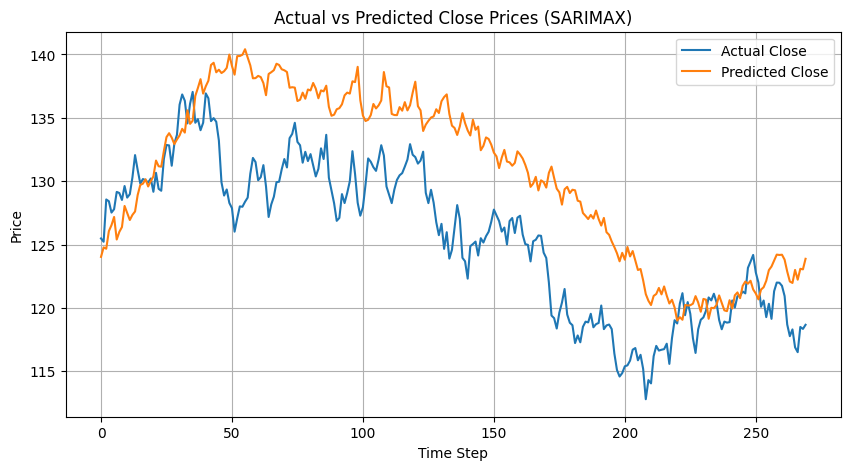

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(actual_close.values, label="Actual Close")
plt.plot(reconstructed_close.values, label="Predicted Close")
plt.legend()
plt.title("Actual vs Predicted Close Prices (SARIMAX)")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid()
plt.show()

RMSE measures the average prediction error in the same units as your target variable — in this case, stock price.

An RMSE of 6.30 suggests that on average, your model’s predictions are off by about 6.30 units of price.



In [43]:
!pip install prophet

In [44]:
# Facebook Prophet
from prophet import Prophet

#train data frame
df_train_prophet = df_train.rename(columns={'Close': 'y', 'Date':'ds'})
df_train_prophet.head()

dt_test_prophet = dt_test.rename(columns={'Close': 'y', 'Date':'ds'})
dt_test_prophet.head()

#instantiate prophet
model = Prophet()

model.fit(df_train_prophet)
future_data =dt_test_prophet[['ds']]
dt_test_prophet.head()

forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


#Mean square error
prophet_mse = mean_squared_error(dt_test_prophet['y'], forecast_data['yhat'])
prophet_rmse= sqrt(mean_squared_error(dt_test_prophet['y'], forecast_data['yhat']))
print('MSE: %.6f' % prophet_mse)
print('RMSE: %.6f' % prophet_rmse)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuerbig73/dx9ty3au.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuerbig73/_9oqjj8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90149', 'data', 'file=/tmp/tmpuerbig73/dx9ty3au.json', 'init=/tmp/tmpuerbig73/_9oqjj8s.json', 'output', 'file=/tmp/tmpuerbig73/prophet_modelvsdkbl3j/prophet_model-20250521113034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:30:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:30:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE: 178.371701
RMSE: 13.355587


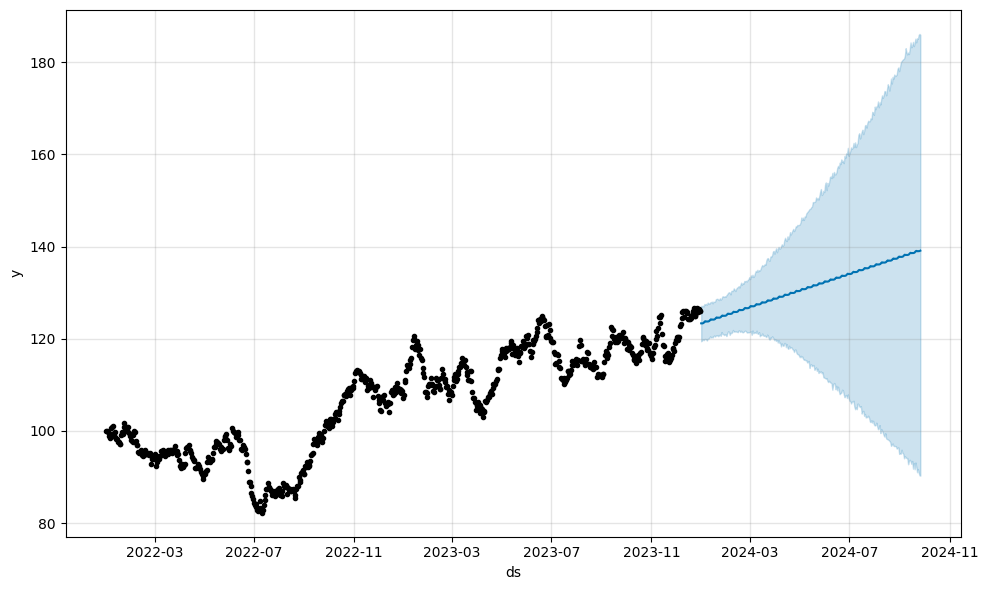

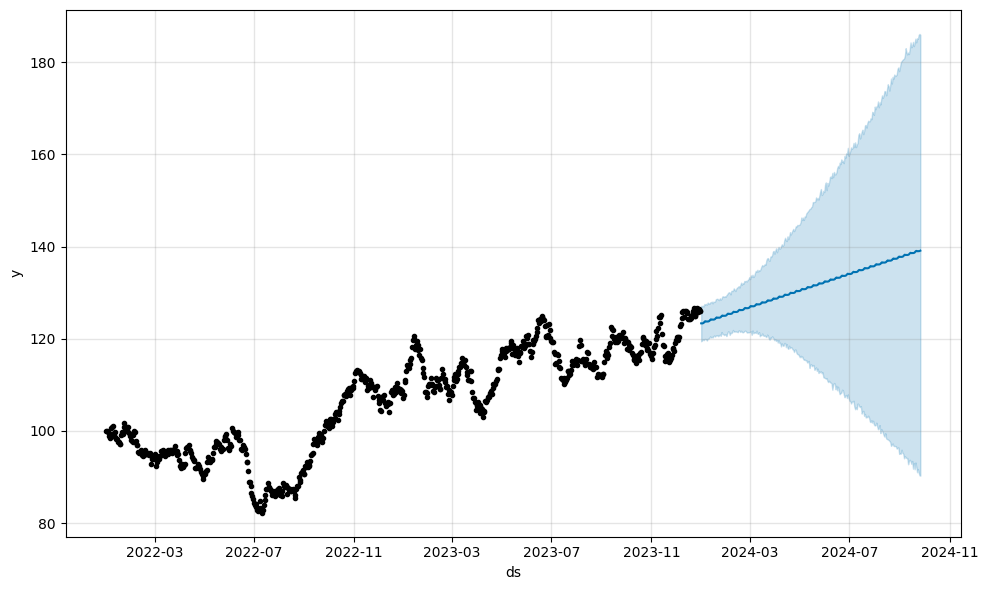

In [45]:
model.plot(forecast_data)

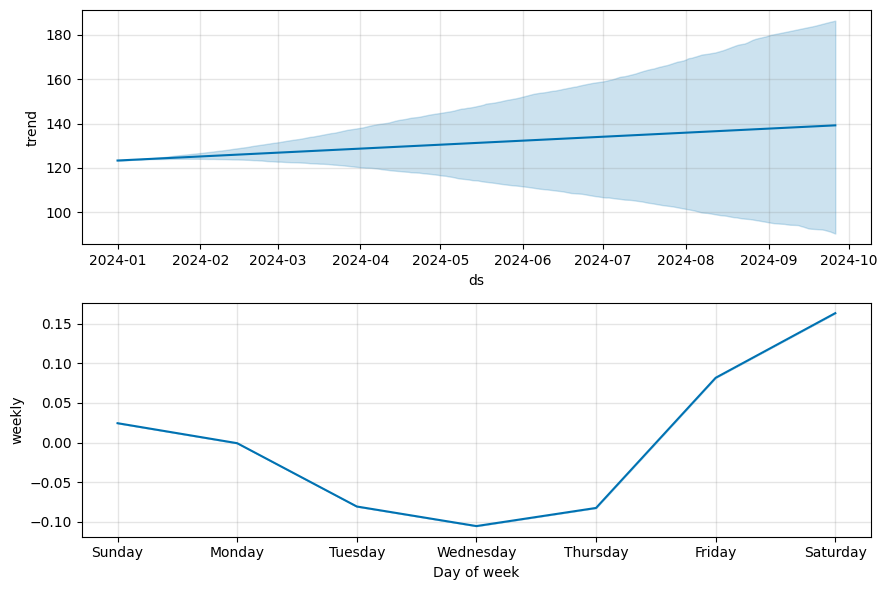

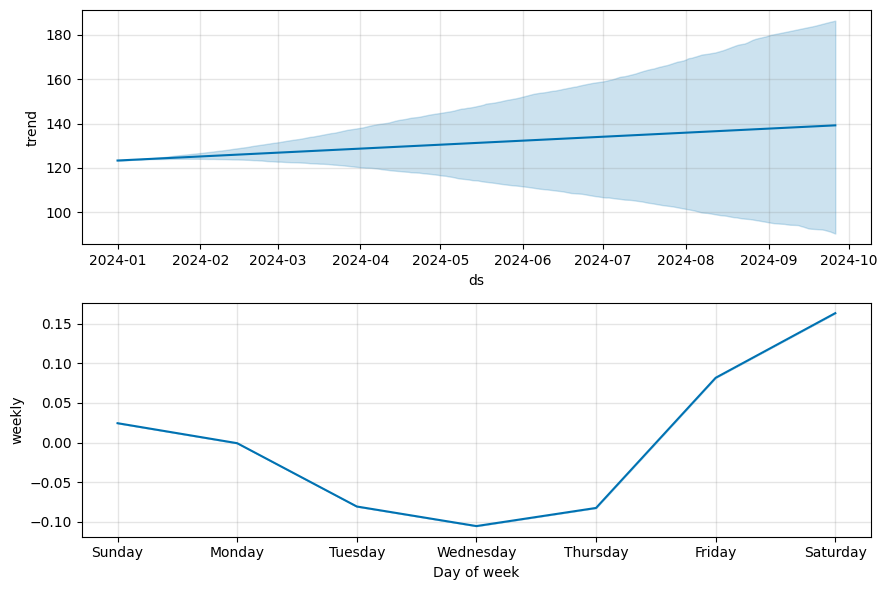

In [46]:
model.plot_components(forecast_data)

In [47]:
# make sure we save the original forecast data
forecast_data_orig = forecast_data
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
from plotly.offline import iplot

# Dates for X-axis
dates = final_df["ds"]

# Plot traces
actual_chart = go.Scatter(x=dates, y=dt_test_prophet["y"], name='Actual', mode='lines', line=dict(color='black'))
predict_chart = go.Scatter(x=dates, y=final_df["yhat"], name='Predicted', mode='lines', line=dict(color='blue'))
predict_chart_upper = go.Scatter(x=dates, y=final_df["yhat_upper"], name='Upper Bound', mode='lines', line=dict(dash='dot', color='lightblue'))
predict_chart_lower = go.Scatter(x=dates, y=final_df["yhat_lower"], name='Lower Bound', mode='lines', line=dict(dash='dot', color='lightblue'))

# Layout
layout = go.Layout(title='Facebook Prophet Forecast vs Actual',
                   xaxis_title='Date',
                   yaxis_title='Close Price',
                   template='plotly_white')

# Plot
fig = go.Figure(data=[actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], layout=layout)
iplot(fig)

In [48]:
!pip install keras

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare data
stock_market = stock_market.sort_values('Date')
data = stock_market[['Close']].values

# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create time-series dataset
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split (e.g., 80% train)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict
predictions = model.predict(X_test)

# Invert scale
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
from sklearn.metrics import mean_squared_error
LSTM_rmse = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
print(f"Test RMSE: {LSTM_rmse:.4f}")


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - loss: 0.1956
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0107
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0047
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0041
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0033
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0035
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0033
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0030
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0027
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0027
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0025
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0024
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0023
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0021
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0022
Ep

Training loss steadily decreased, showing your model was learning effectively over the 20 epochs.

Test RMSE (1.75) shows the average prediction error in terms of the original Close price scale.

This is much better than Prophet's RMSE (13.36) and Auto ARIMA RMSE (6.30), which suggests your LSTM is capturing temporal patterns more effectively.

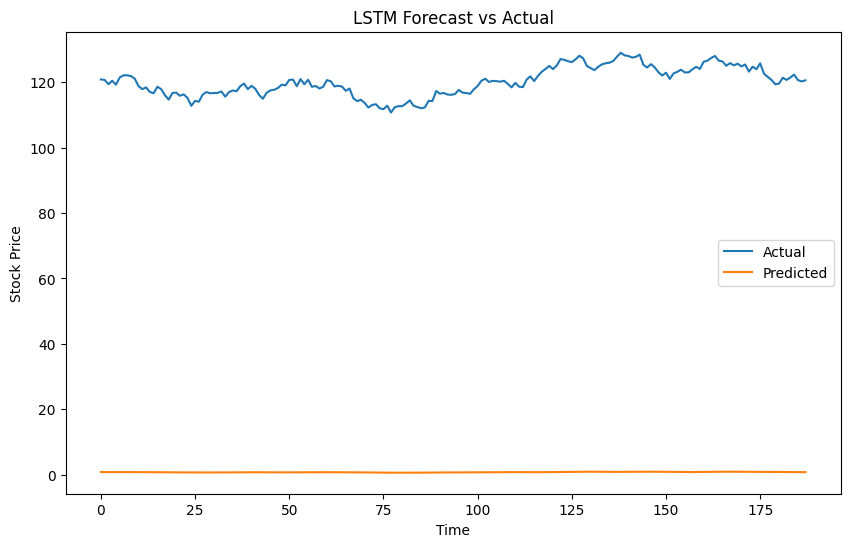

In [50]:
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [59]:
!pip install tensorflow scikit-learn
!pip install keras-tuner --quiet

In [60]:
#Hyperparameter tuning

from tensorflow import keras
from kerastuner.tuners import RandomSearch
from keras.layers import  Dropout


def build_model(hp):
    model = Sequential()

    # Tune number of LSTM units
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   return_sequences=False,
                   input_shape=(X_train.shape[1], X_train.shape[2])))

    # Tune dropout rate
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))

    # Dense output
    model.add(Dense(1))

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuner',
    project_name='time_series_lstm'
)

#Prepare data
X_train.shape
y_train.shape

#Run tuning
tuner.search(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
# Best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

print("Best parameters:")
print(f"Units: {best_hps.get('units')}")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Learning Rate: {best_hps.get('lr')}")

Trial 10 Complete [00h 00m 30s]
val_loss: 0.0009943874320015311

Best val_loss So Far: 0.0008286215015687048
Total elapsed time: 00h 04m 36s
Best parameters:
Units: 96
Dropout: 0.2
Learning Rate: 0.01


In [61]:
#Use the best parameters to define your final model
import tensorflow as tf
best_model = Sequential()
best_model.add(LSTM(96, return_sequences=False, input_shape=(X_train.shape[1], 1)))
best_model.add(Dropout(0.2))
best_model.add(Dense(1))

best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss='mean_squared_error')

history = best_model.fit(X_train, y_train,
                         validation_data=(X_test, y_test),
                         epochs=20, batch_size=32)
#Evaluate the Model
predictions = best_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Invert scaling on y_test for fair comparison
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

#Metrics
lstm_tuner_rmse = sqrt(mean_squared_error(y_test_inv, predictions))
print("Test RMSE:", lstm_tuner_rmse)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.1498 - val_loss: 0.0170
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0071 - val_loss: 0.0021
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0043 - val_loss: 0.0013
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0

LSTM model after hyperparameter tuning has achieved a Test RMSE of 1.4, which is a solid improvement compared to earlier runs

The best configuration: Units=96, Dropout=0.2, Learning Rate=0.01.

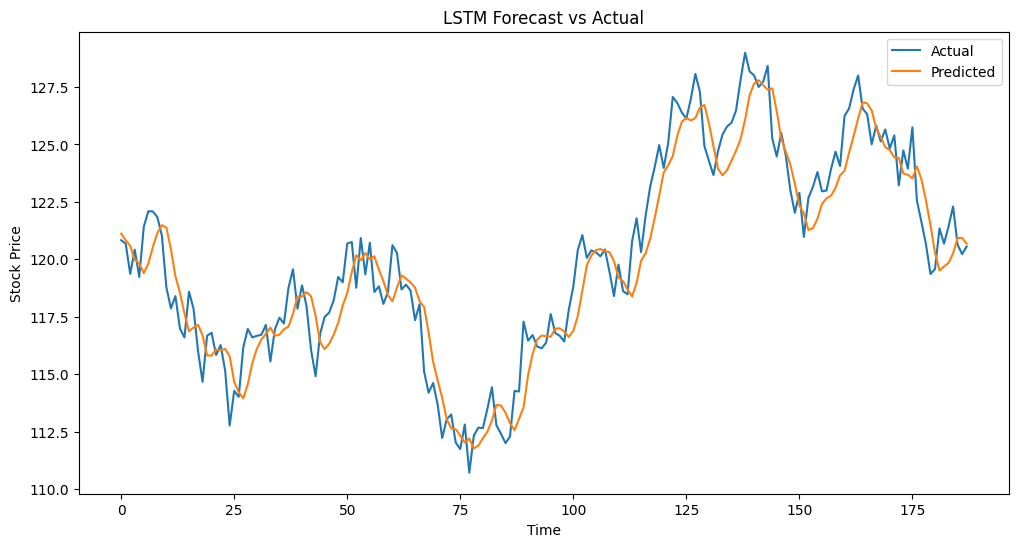

In [62]:
#Plot Predicted vs Actual Values
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

🔍 Recommendation

Based on the evaluation of multiple forecasting models — Prophet, SARIMAX, and a Tuned LSTM — the Tuned LSTM model demonstrated the highest predictive accuracy.

✅ Why Tuned LSTM is Recommended:

📉 Lowest RMSE: The tuned LSTM model achieved the lowest RMSE of 1.4, outperforming Prophet and SARIMAX.

📈 Better Adaptability: LSTM networks are well-suited for capturing complex, non-linear, and long-term dependencies in financial time series data.

🧠 Handling Noisy Data: LSTM's ability to retain information over time makes it especially effective in noisy datasets typical in stock market prediction.

⚖️ Comparison Summary:

| Model            | RMSE      | Notes                                                                                  |
| ---------------- | --------- | -------------------------------------------------------------------------------------- |
| **Prophet**      | **13.36** | Simple, interpretable, but less accurate.|
| **SARIMAX**      | **6.30**  | Good for linear trends & seasonality.    |
| **LSTM (Tuned)** | **1.4**  | Best accuracy, handles complexity well.            |


In [77]:
#Xgboost

from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

#prepare train data
stock_market.sort_values(by=['year'], inplace=True)
stock_market.head()

stock_market_reg=stock_market.drop(['Date','Trend','Market_Cap','PE_Ratio','Dividend_Yield','Volatility','Sentiment_Score','Close_log','Close_doublelog','Close_diff'],axis=1)

df_train =stock_market_reg[stock_market_reg['year']<2024]
X_train = df_train.drop(['Close'],axis=1)
y_train = df_train['Close']

df_test =stock_market_reg[stock_market_reg['year']>=2024]
X_test = df_test.drop(['Close'],axis=1)
y_test = df_test['Close']

#XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

#Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1]
}

#TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5)

#Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    verbose=1
)

#Fit the model
grid_search.fit(X_train, y_train)

#Evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R2 Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Test MSE: 0.1312129565656233
Test RMSE: 0.36223329025039
Test R2 Score: 0.9917268740536312


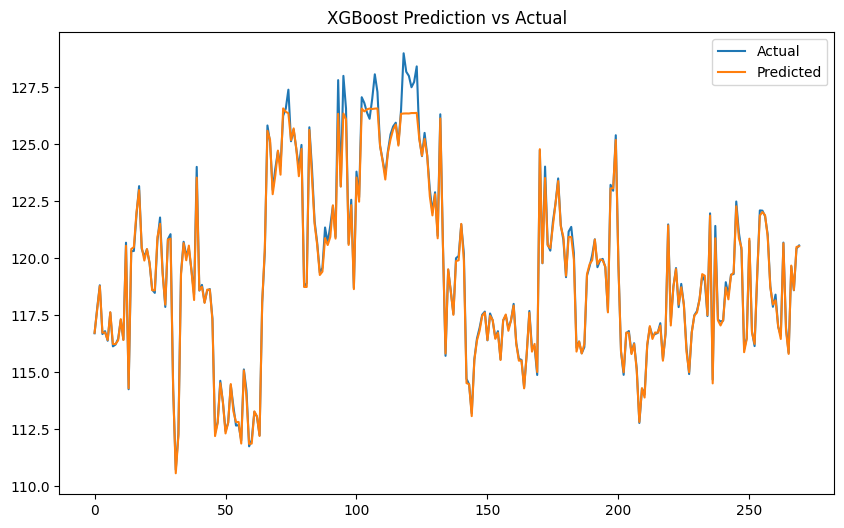

In [78]:
# Optional: Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("XGBoost Prediction vs Actual")
plt.show()

⚖️ Accuracy Comparison (RMSE)

| Model            | RMSE      | Notes                                                                                  |
| ---------------- | --------- | -------------------------------------------------------------------------------------- |
| **XGBoost**      | **0.36**  | Best performer — beats LSTM              |
| **Prophet**      | **13.36** | Easy to use, but limited in flexibility and accuracy.|
| **SARIMAX**      | **6.30**  | Better for stationary, linear trends.    |
| **LSTM (Tuned)** | **1.4**  | Very strong, especially for deep temporal dependencies.            |

✅ Conclusion: XGBoost outperforms all others, including LSTM, based on RMSE.